In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats


In [2]:
df = pd.read_csv("../uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.dropna(inplace=True)

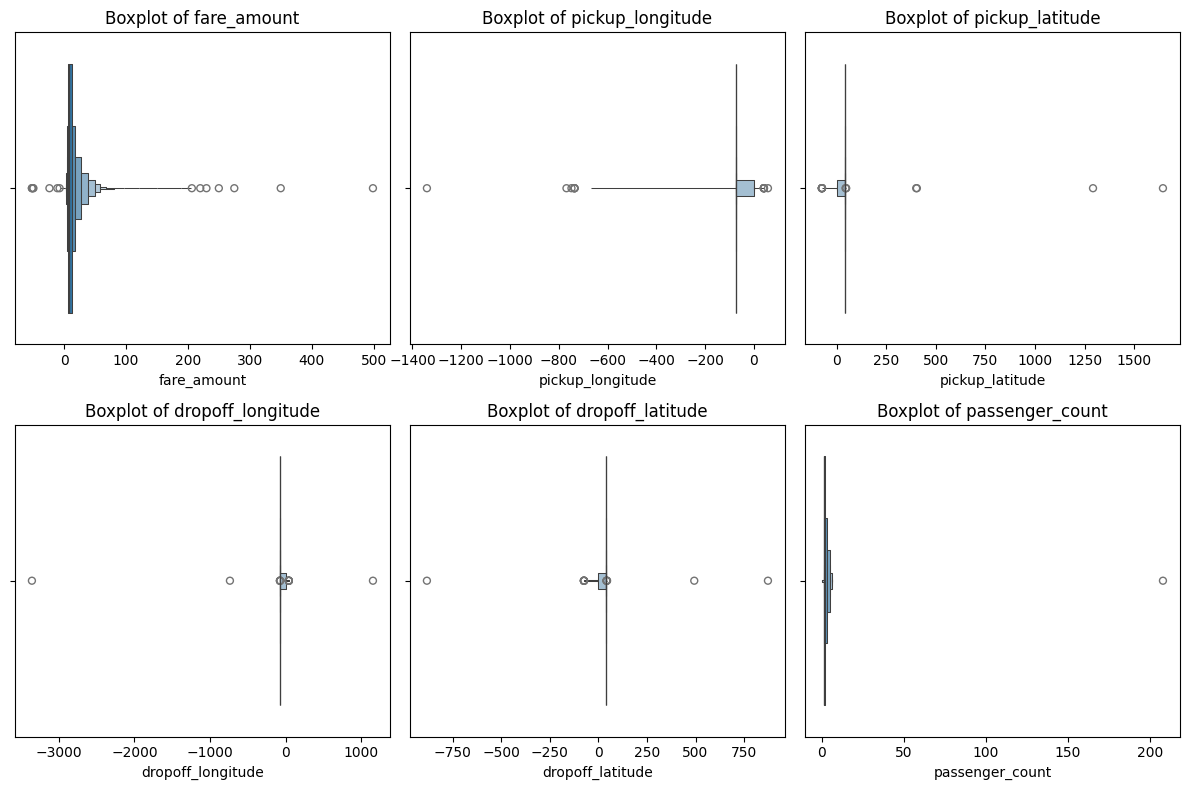

In [7]:
numeric_columns = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2,3,i)
    sns.boxenplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()  
plt.show()


In [12]:
z_scores = np.abs(stats.zscore(df[numeric_columns]))
threshold = 3

outlier_indices = np.where(z_scores > threshold)
data = df.drop(df.index[outlier_indices[0]])
data


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


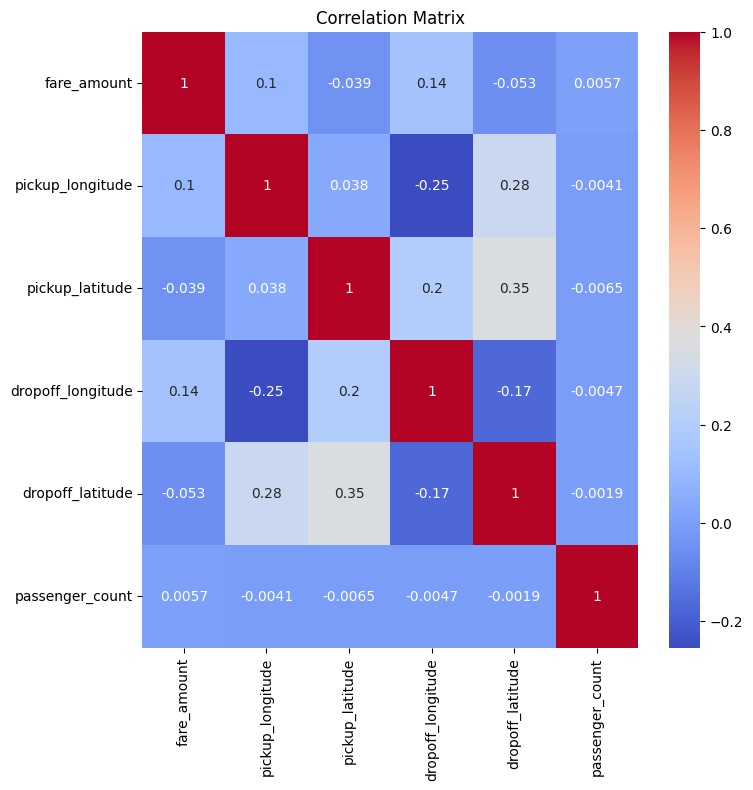

In [14]:
corr = data[numeric_columns].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [15]:
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [16]:
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [19]:
y_pred = linear.predict(X_test)

In [20]:
linear_r2score = r2_score(Y_test, y_pred)
linear_rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

In [23]:
print("Linear Regression R2 Score:", linear_r2score)
print("Linear Regression RMSE:", linear_rmse)

Linear Regression R2 Score: 0.06403658365522547
Linear Regression RMSE: 6.241342952510798


In [25]:
rf_reg = RandomForestRegressor(n_estimators=50, random_state=4)
rf_reg.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=50, random_state=4)

In [26]:
rf_pred = rf_reg.predict(X_test)


In [ ]:
rf_reg_r2 = r2_score(Y_test, rf_pred)
rf_reg_rmse = np.sqrt(mean_squared_error(Y_test, rf_pred))
print("Random Forest Regression R2 Score:", rf_reg_r2)
print("Random Forest Regression RMSE:", rf_reg_rmse)

Random Forest Regression R^2 Score: 0.8110432271513646
Random Forest Regression RMSE: 2.8043346728918195
